In [1]:
%pip install pandas

     ---------------------------------------- 10.7/10.7 MB 6.8 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr8\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr8\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached Pillow-9.5.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr8\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\data\innopolis\innopolis_labs\lr8\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Примените методы снижения размерности (до двумерного представления `n_components=2`) перечисленные ниже для данных diabetes.csv. Здесь - метка (учитель) является столбец / атрибут - outcome.

Среднеквадратичная ошибка: 0.5218012392614343


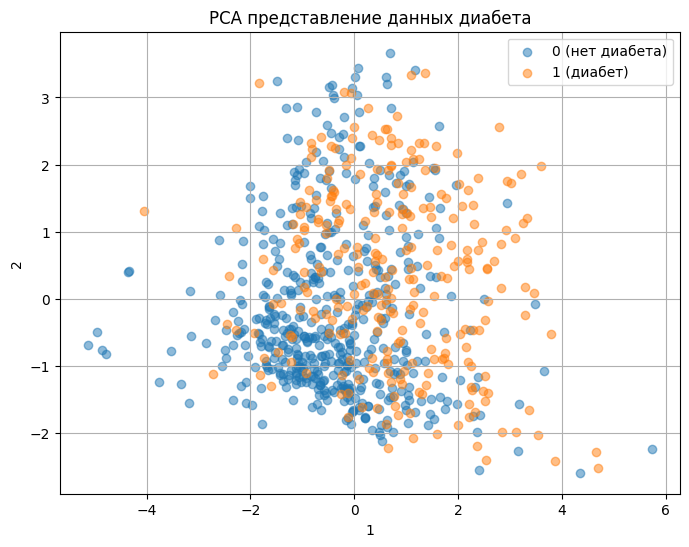

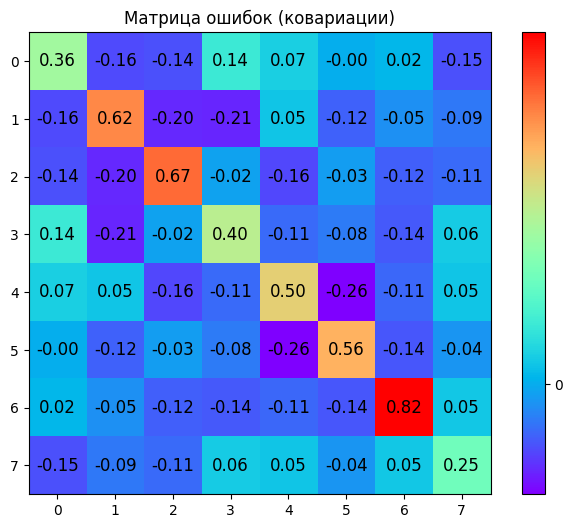

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA с n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Восстановление данных
X_reconstructed = pca.inverse_transform(X_pca)

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f'Среднеквадратичная ошибка: {mse}')



# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('PCA представление данных диабета')
plt.legend()
plt.grid()
plt.show()

# Вычисление ошибки
error = X_scaled - X_reconstructed

# Вычисление матрицы ошибок
cov_error = np.cov(error.T)

# График матрицы ошибок
plt.figure(figsize=(8, 6))
img = plt.imshow(cov_error, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
for x in range(cov_error.shape[0]):
    for y in range(cov_error.shape[1]):
        plt.text(x, y, "%0.2f" % cov_error[x, y], size=12, color='black', ha="center", va="center")
plt.title('Матрица ошибок (ковариации)')
plt.show()


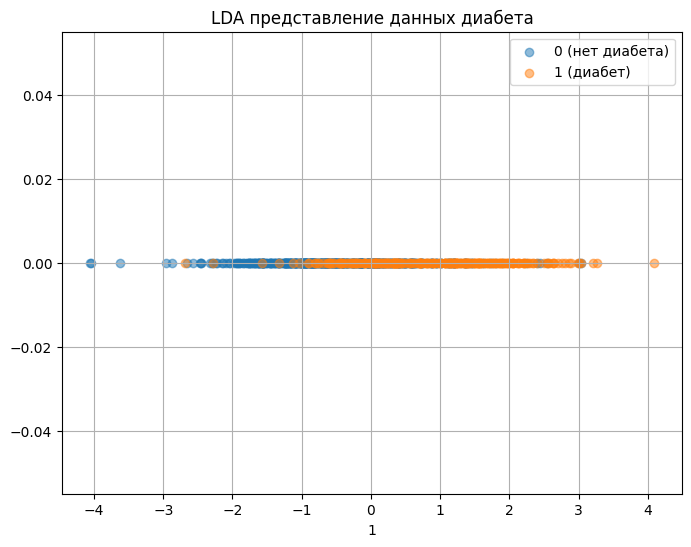

Среднеквадратичная ошибка: 0.8550852578454307


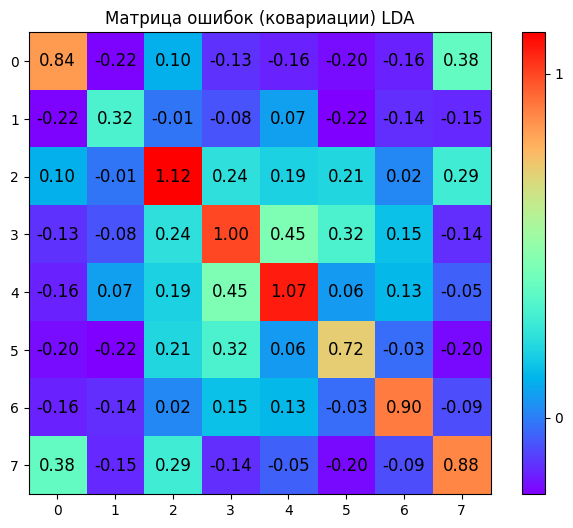

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение LDA с n_components=1
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], np.zeros_like(X_lda[y == 0]), alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.title('LDA представление данных диабета')
plt.legend()
plt.grid()
plt.show()

# Восстановление данных
X_reconstructed = np.dot(X_lda, lda.scalings_.T)

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f'Среднеквадратичная ошибка: {mse}')

# Вычисление ошибки
error = X_scaled - X_reconstructed

# Вычисление матрицы ошибок
cov_error = np.cov(error.T)

# График матрицы ошибок
plt.figure(figsize=(8, 6))
img = plt.imshow(cov_error, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
for x in range(cov_error.shape[0]):
    for y in range(cov_error.shape[1]):
        plt.text(x, y, "%0.2f" % cov_error[x, y], size=12, color='black', ha="center", va="center")
plt.title('Матрица ошибок (ковариации) LDA')
plt.show()


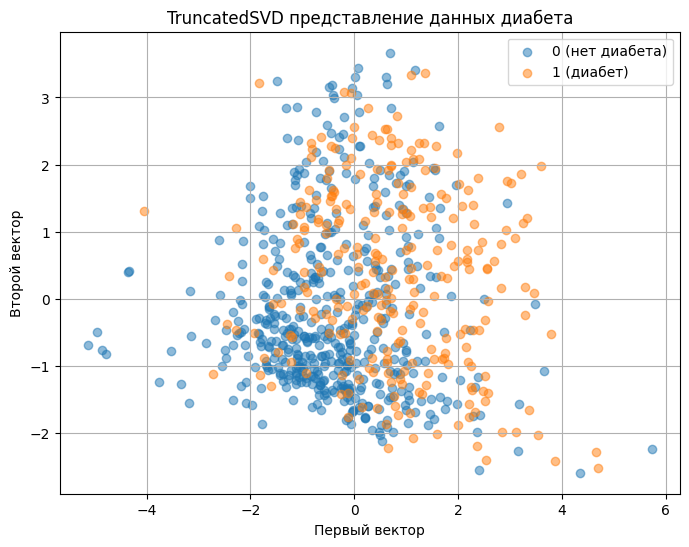

Среднеквадратичная ошибка: 0.5218012392614344


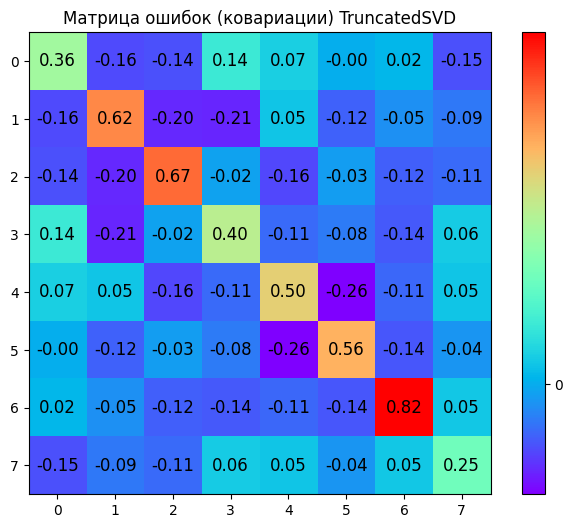

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение TruncatedSVD с n_components=2
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[y == 0, 0], X_svd[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_svd[y == 1, 0], X_svd[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('Первый вектор')
plt.ylabel('Второй вектор')
plt.title('TruncatedSVD представление данных диабета')
plt.legend()
plt.grid()
plt.show()

# Восстановление данных
X_reconstructed = svd.inverse_transform(X_svd)

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(X_scaled, X_reconstructed)
print(f'Среднеквадратичная ошибка: {mse}')

# Вычисление ошибки
error = X_scaled - X_reconstructed

# Вычисление матрицы ошибок
cov_error = np.cov(error.T)

# График матрицы ошибок
plt.figure(figsize=(8, 6))
img = plt.imshow(cov_error, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.045)
for x in range(cov_error.shape[0]):
    for y in range(cov_error.shape[1]):
        plt.text(x, y, "%0.2f" % cov_error[x, y], size=12, color='black', ha="center", va="center")
plt.title('Матрица ошибок (ковариации) TruncatedSVD')
plt.show()


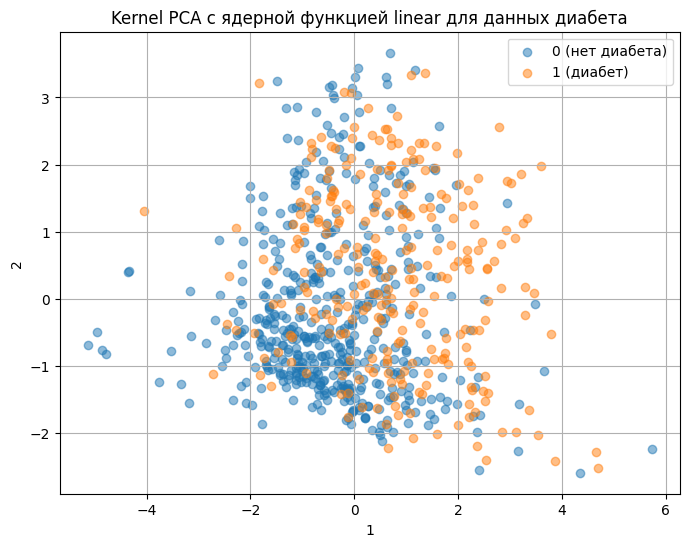

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение Kernel PCA с ядерной функцией linear и n_components=2
kpca = KernelPCA(n_components=2, kernel='linear')
X_kpca = kpca.fit_transform(X_scaled)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Kernel PCA с ядерной функцией linear для данных диабета')
plt.legend()
plt.grid()
plt.show()


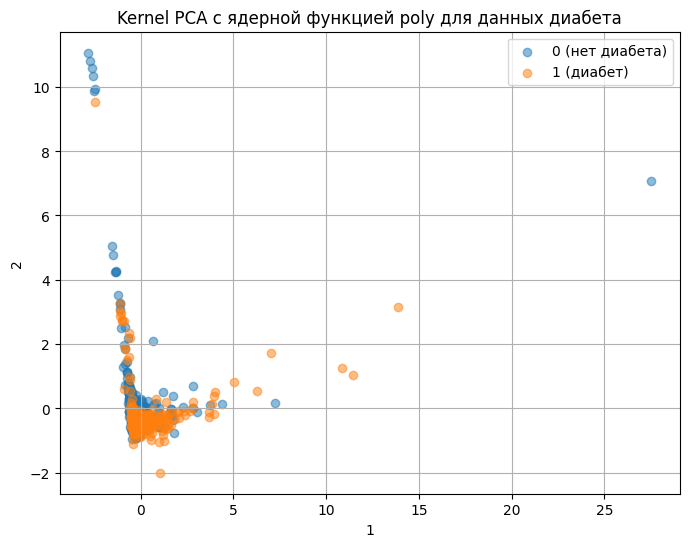

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение Kernel PCA с ядерной функцией poly и n_components=2
kpca = KernelPCA(n_components=2, kernel='poly')
X_kpca = kpca.fit_transform(X_scaled)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Kernel PCA с ядерной функцией poly для данных диабета')
plt.legend()
plt.grid()
plt.show()


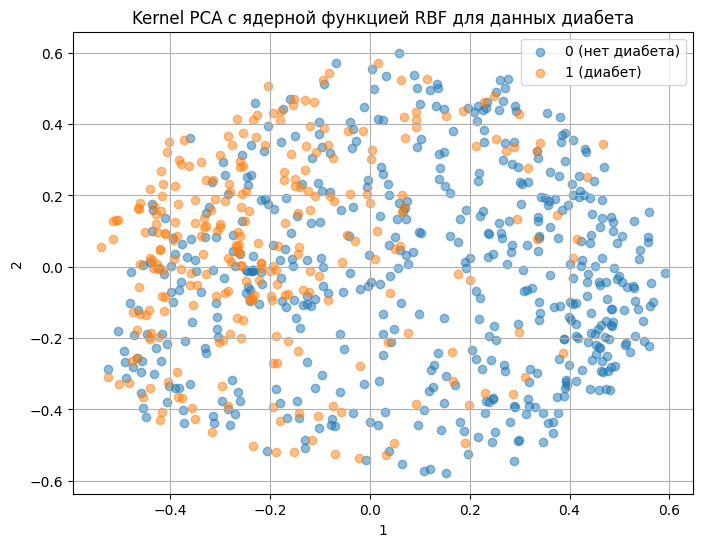

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение Kernel PCA с ядерной функцией RBF и n_components=2
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Kernel PCA с ядерной функцией RBF для данных диабета')
plt.legend()
plt.grid()
plt.show()


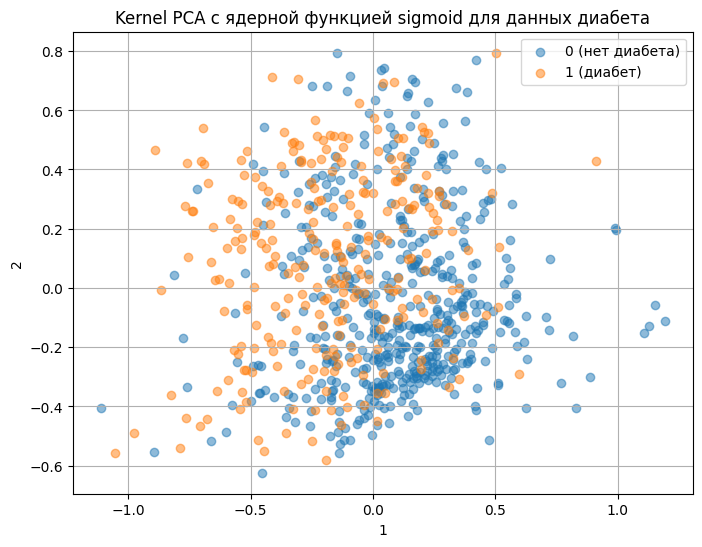

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение Kernel PCA с ядерной функцией сигмоид и n_components=2
kpca = KernelPCA(n_components=2, kernel='sigmoid')
X_kpca = kpca.fit_transform(X_scaled)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Kernel PCA с ядерной функцией sigmoid для данных диабета')
plt.legend()
plt.grid()
plt.show()


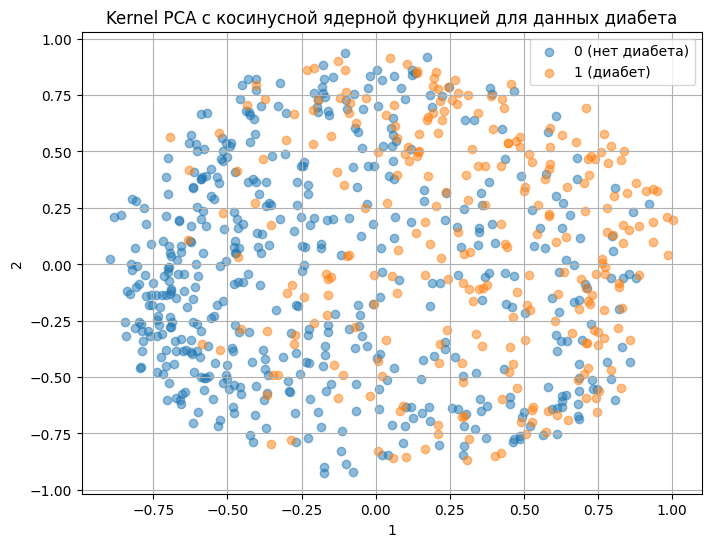

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение Kernel PCA с косинусной ядерной функцией и n_components=2
kpca = KernelPCA(n_components=2, kernel='cosine')
X_kpca = kpca.fit_transform(X_scaled)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Kernel PCA с косинусной ядерной функцией для данных диабета')
plt.legend()
plt.grid()
plt.show()


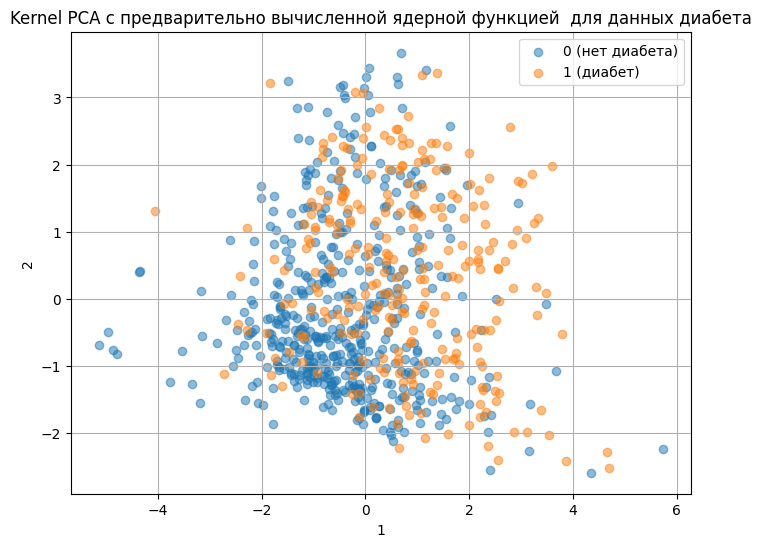

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import linear_kernel

# Загрузка данных из файла CSV
data = pd.read_csv('diabetes.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Вычисление предварительно вычисленной ядерной матрицы (линейная ядерная матрица)
precomputed_kernel = linear_kernel(X_scaled)

# Применение Kernel PCA с предварительно вычисленной ядерной функцией и n_components=2
kpca = KernelPCA(n_components=2, kernel='precomputed')
X_kpca = kpca.fit_transform(precomputed_kernel)

# График групп
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], alpha=0.5, label='0 (нет диабета)')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], alpha=0.5, label='1 (диабет)')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Kernel PCA с предварительно вычисленной ядерной функцией  для данных диабета')
plt.legend()
plt.grid()
plt.show()
